#                                            Microsoft Movie Studios

![pandas](https://avatars.githubusercontent.com/u/6154722?s=280&v=4)

## Three business plans in order to have the highest ROI

### First we are going to study the data

In [3]:
# Import everything needed in order to manipulate data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [4]:
import json
import csv

We are going to focus first on movie budgests. 

In [5]:
movie_budgets = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")

In [6]:
 movie_budgets 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We also check for null values. 


In [8]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Luckly we don't have any

As we can see the data needs to get cleaned up. We got values that we need to manipulate showing up as objects and we want to focus on movies that have been made more recently. 

Here we are going to start by cleaning up the date. We want to focus on the year the movie was released. 

In [9]:
# movie_budgets['release_date'] = (movie_budgets['release_date'].map(lambda x: x[-4:]))
# movie_budgets

In [10]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Since the type for the columns I want to use come out as object I'll change them to int.

In [11]:
def clean_money(df, money_column):
    df[money_column] = df[money_column].str.replace(',','')
    df[money_column] = df[money_column].str.replace('$','')
    df[money_column] = pd.to_numeric(df[money_column])
    return df

In [12]:
# # Organize all the data
# movie_info = pd.read_csv("./rt.movie_info.tsv.gz", sep="\t")
# movie_reviews = pd.read_csv("./rt.reviews.tsv.gz", sep="\t", encoding = 'unicode_escape')
# bom_movie_gross = pd.read_csv("bom.movie_gross.csv.gz")
# movie_budgets = pd.read_csv("tn.movie_budgets.csv.gz")



In [13]:
movie_budgets = clean_money(movie_budgets, "domestic_gross")
movie_budgets = clean_money(movie_budgets, "worldwide_gross")
movie_budgets = clean_money(movie_budgets, "production_budget")

In [14]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [15]:
movie_budgets['release_date'] = (movie_budgets['release_date'].map(lambda x: x[0:3]))
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec,Avatar,425000000,760507625,2776345279
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun,Dark Phoenix,350000000,42762350,149762350
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec,Red 11,7000,0,0
5778,79,Apr,Following,6000,48482,240495
5779,80,Jul,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep,A Plague So Pleasant,1400,0,0


In [16]:
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jan','1')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Feb','2')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Mar','3')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Apr','4')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('May','5')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jun','6')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Jul','7')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Aug','8')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Sep','9')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Oct','10')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Nov','11')
movie_budgets['release_date'] = movie_budgets['release_date'].str.replace('Dec','12')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12,Avatar,425000000,760507625,2776345279
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,6,Dark Phoenix,350000000,42762350,149762350
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,12,Red 11,7000,0,0
5778,79,4,Following,6000,48482,240495
5779,80,7,Return to the Land of Wonders,5000,1338,1338
5780,81,9,A Plague So Pleasant,1400,0,0


In [17]:
movie_budgets = movie_budgets.astype({'release_date': 'int'})

In [18]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   int64 
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 271.2+ KB


##### We are going to add a new column that deals with international gross 

In [19]:
movie_budgets['international_gross_only'] = movie_budgets['worldwide_gross'] - movie_budgets['domestic_gross']
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross_only
0,1,12,Avatar,425000000,760507625,2776345279,2015837654
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,6,Dark Phoenix,350000000,42762350,149762350,107000000
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
...,...,...,...,...,...,...,...
5777,78,12,Red 11,7000,0,0,0
5778,79,4,Following,6000,48482,240495,192013
5779,80,7,Return to the Land of Wonders,5000,1338,1338,0
5780,81,9,A Plague So Pleasant,1400,0,0,0


###### The ROI is including worldwide gross

In [20]:
movie_budgets['ROI'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget'] - 1
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross_only,ROI
0,1,12,Avatar,425000000,760507625,2776345279,2015837654,5.532577
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,1.546673
2,3,6,Dark Phoenix,350000000,42762350,149762350,107000000,-0.572108
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,3.243841
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,3.153696


In [21]:
# movie_budgets['release date'] = pd.to_datetime(movie_budgets['release_date']).dt.month



# This code might work but ask Daniel how to run it 

Here we finally get our data into integers for everything we want to manipulate

In [22]:
movie_budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross,international_gross_only,ROI
count,5782.000000,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,7.050675,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,3.800161
std,28.821076,3.480147,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,29.530282
min,1.000000,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,25.000000,4.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-0.507704
50%,50.000000,7.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,0.708310
75%,75.000000,10.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,2.758346
max,100.000000,12.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,1799.000000


In [23]:
worldwide_mean = movie_budgets['worldwide_gross'].mean()
worldwide_mean

91487460.90643376

In [24]:
domestic_mean = movie_budgets['domestic_gross'].mean()
domestic_mean

41873326.867001034

In [25]:
production_budge_mean = movie_budgets['production_budget'].mean()
production_budge_mean

31587757.0965064

In [26]:
international_mean = movie_budgets['international_gross_only'].mean()
international_mean

49614134.03943272

In [27]:
# use the group by
# use the median to be less affected by outliers 
# 

In [28]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross_only,ROI
0,1,12,Avatar,425000000,760507625,2776345279,2015837654,5.532577
1,2,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,1.546673
2,3,6,Dark Phoenix,350000000,42762350,149762350,107000000,-0.572108
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,3.243841
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,3.153696
...,...,...,...,...,...,...,...,...
5777,78,12,Red 11,7000,0,0,0,-1.000000
5778,79,4,Following,6000,48482,240495,192013,39.082500
5779,80,7,Return to the Land of Wonders,5000,1338,1338,0,-0.732400
5780,81,9,A Plague So Pleasant,1400,0,0,0,-1.000000


In [29]:
mean_roi_all_year = movie_budgets.groupby(['release_date'])['ROI'].median()
mean_roi_all_year

release_date
1     0.512054
2     0.740280
3     0.531329
4     0.399866
5     1.075749
6     1.252110
7     1.244067
8     0.682874
9     0.300893
10    0.441032
11    1.168355
12    0.628805
Name: ROI, dtype: float64

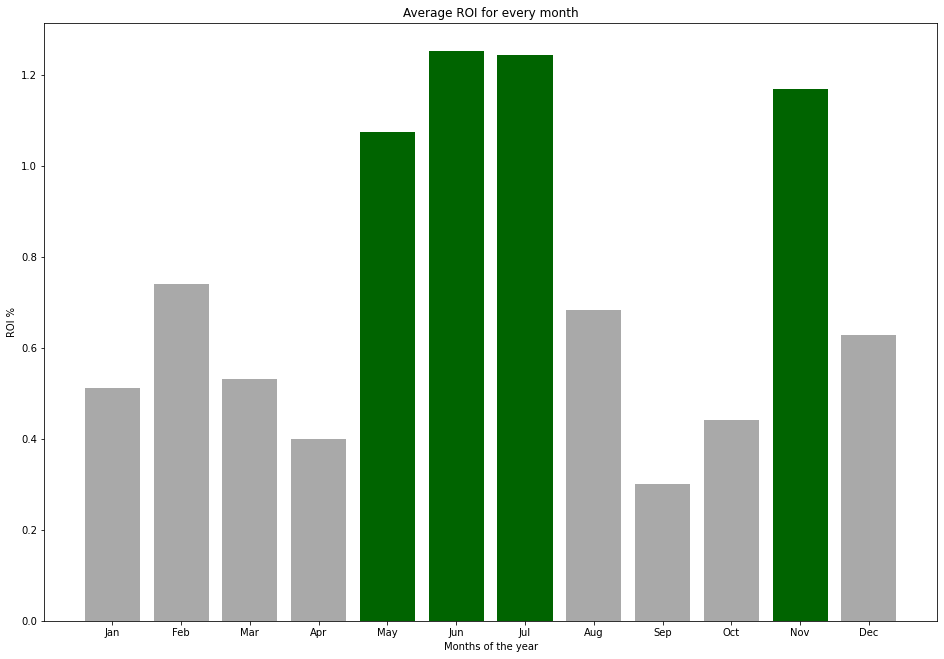

In [30]:
fig, ax = plt.subplots(figsize=(16, 11))
height = [0.512054, 0.740280, 0.531329, 0.399866, 1.075749, 1.252110, 1.244067, 0.682874, 0.300893, 0.441032, 1.168355, 0.628805]

bars = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color=('darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgreen', 
                              'darkgreen', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgrey'))


# Create names on the x-axis
plt.xticks(y_pos, bars)

# Label x, y and title
ax.set_title('Average ROI for every month')
ax.set_ylabel('ROI %')
ax.set_xlabel('Months of the year')

# Show graphic
plt.show()